In [10]:
import json
import pandas as pd

# Load the evaluated responses from the JSON file
with open('LIAR-Evaluated.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Extract numeric part and remove '%' character from 'true certainty', then convert to numeric
df['true certainty'] = pd.to_numeric(df['true certainty'].str.extract('(\d+)', expand=False).str.replace('%', ''), errors='coerce')

# Remove all periods from 'inferred certainty', then convert to numeric
df['inferred certainty'] = pd.to_numeric(df['inferred certainty'].str.replace('.', ''), errors='coerce')

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Now print out the 'true certainty', 'inferred certainty' columns
print(df[['true certainty', 'inferred certainty']])

     true certainty  inferred certainty
0                90                90.0
1                80                90.0
2                90                95.0
3                90                90.0
4                95                90.0
5                80                50.0
6                95                90.0
7                70                95.0
8                90                65.0
9                80                90.0
10               90                 NaN
11               95                95.0
12               80                80.0
13               95               100.0
14                0                95.0
15               90                90.0
16               95                95.0
17               80                70.0
18               95               100.0
19               75                95.0
20               80                80.0
21               95                95.0
22               80                90.0
23               95                95.0


Average absolute difference: 10.722513089005236


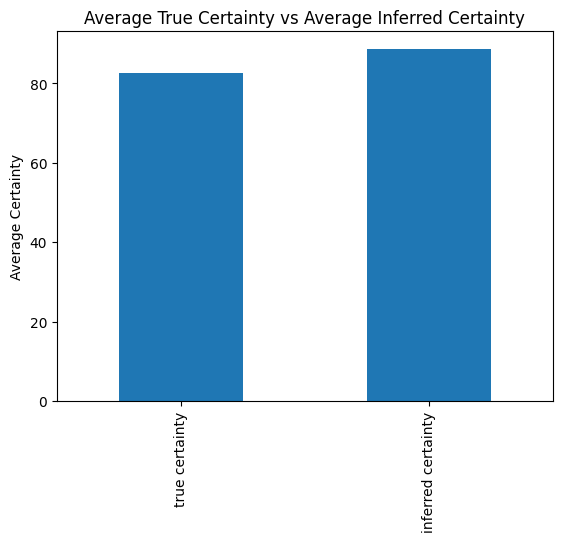

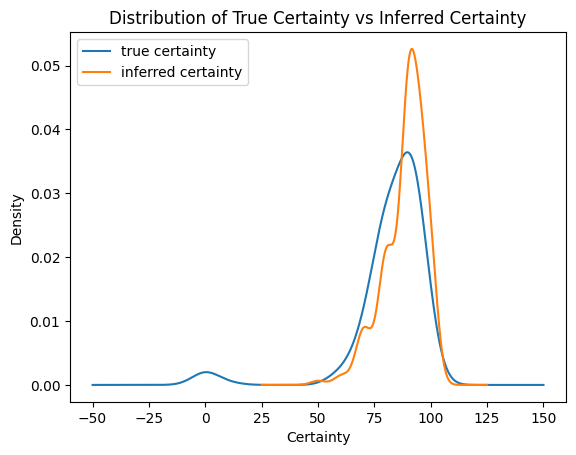

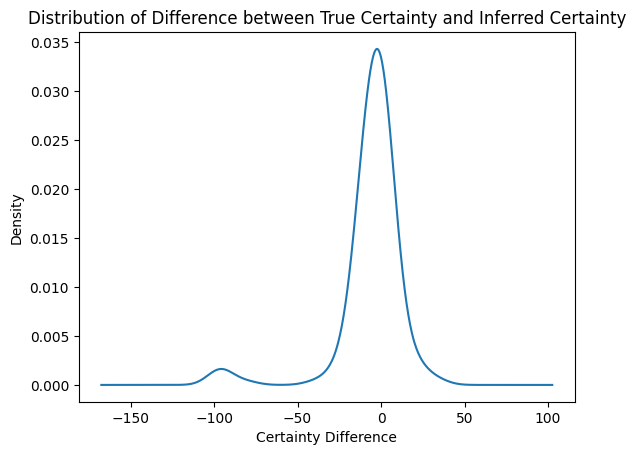

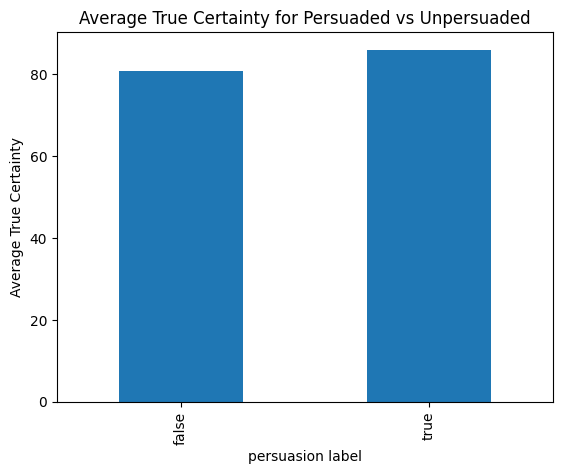

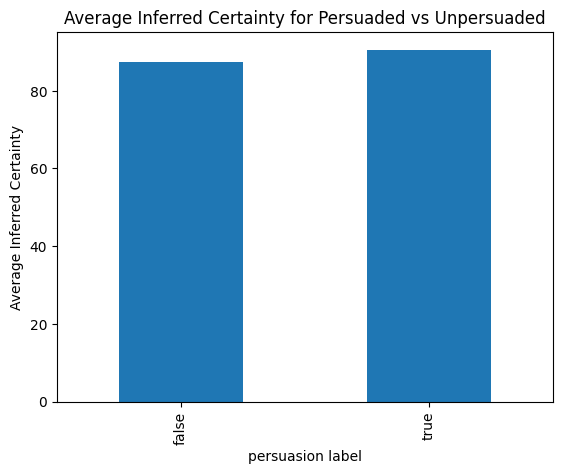

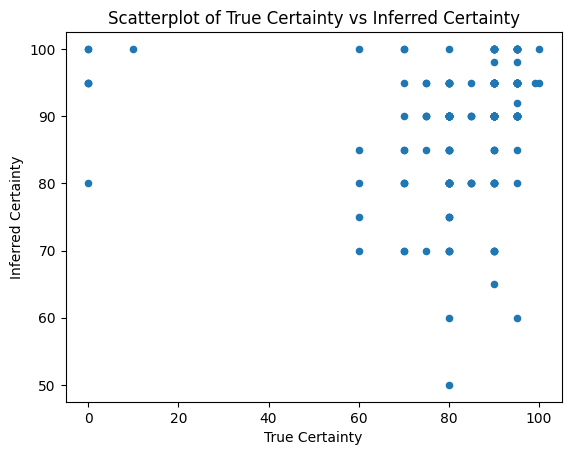

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the evaluated responses from the JSON file
with open('LIAR-Evaluated.json', 'r') as f:
    data = json.load(f)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Extract numeric part and remove '%' character from 'true certainty', then convert to numeric
df['true certainty'] = pd.to_numeric(df['true certainty'].str.extract('(\d+)', expand=False).str.replace('%', ''), errors='coerce')

# Remove all periods from 'inferred certainty', then convert to numeric
df['inferred certainty'] = pd.to_numeric(df['inferred certainty'].str.replace('.', ''), errors='coerce')

# Convert the 'persuasion label' column to lowercase
df['persuasion label'] = df['persuasion label'].str.lower()

# Calculate the difference between true certainty and inferred certainty
df['certainty difference'] = df['true certainty'] - df['inferred certainty']

# Calculate the absolute difference between true certainty and inferred certainty
df['absolute certainty difference'] = abs(df['true certainty'] - df['inferred certainty'])

# Calculate and print the average absolute difference
average_absolute_difference = df['absolute certainty difference'].mean()
print(f"Average absolute difference: {average_absolute_difference}")

# 1. Bar chart comparing the average true certainty with the average inferred certainty
df[['true certainty', 'inferred certainty']].mean().plot(kind='bar')
plt.title('Average True Certainty vs Average Inferred Certainty')
plt.ylabel('Average Certainty')
plt.show()

# 2. Distribution comparing the average true certainty with the average inferred certainty
df[['true certainty', 'inferred certainty']].plot(kind='density')
plt.title('Distribution of True Certainty vs Inferred Certainty')
plt.xlabel('Certainty')
plt.show()

# 3. Distribution of the difference between average true certainty with average inferred certainty
df['certainty difference'].plot(kind='density')
plt.title('Distribution of Difference between True Certainty and Inferred Certainty')
plt.xlabel('Certainty Difference')
plt.show()

# 4. Average true certainty for persuaded vs unpersuaded
df.groupby('persuasion label')['true certainty'].mean().plot(kind='bar')
plt.title('Average True Certainty for Persuaded vs Unpersuaded')
plt.ylabel('Average True Certainty')
plt.show()

# 5. Average inferred certainty for persuaded vs. unpersuaded
df.groupby('persuasion label')['inferred certainty'].mean().plot(kind='bar')
plt.title('Average Inferred Certainty for Persuaded vs Unpersuaded')
plt.ylabel('Average Inferred Certainty')
plt.show()

# Scatterplot between inferred certainty and true certainty
df.plot(kind='scatter', x='true certainty', y='inferred certainty')
plt.title('Scatterplot of True Certainty vs Inferred Certainty')
plt.xlabel('True Certainty')
plt.ylabel('Inferred Certainty')
plt.show()

In [12]:
# Print the total number of data points
print(f"Total data points: {df.shape[0]}")

Total data points: 209


In [13]:
# Calculate the absolute difference between true certainty and inferred certainty
df['absolute certainty difference'] = abs(df['true certainty'] - df['inferred certainty'])

# Calculate and print the average absolute difference
average_absolute_difference = df['absolute certainty difference'].mean()
print(f"Average absolute difference: {average_absolute_difference}")

Average absolute difference: 10.722513089005236


In [14]:
# Print the 'absolute certainty difference' column
print(df['absolute certainty difference'])

0        0.0
1       10.0
2        5.0
3        0.0
4        5.0
5       30.0
6        5.0
7       25.0
8       25.0
9       10.0
10       NaN
11       0.0
12       0.0
13       5.0
14      95.0
15       0.0
16       0.0
17      10.0
18       5.0
19      20.0
20       0.0
21       0.0
22      10.0
23       0.0
24      10.0
25       0.0
26      90.0
27       5.0
28       0.0
29      10.0
30      15.0
31      20.0
32       0.0
33      10.0
34       NaN
35       5.0
36       0.0
37       4.0
38      10.0
39       0.0
40       5.0
41       5.0
42       5.0
43      15.0
44       NaN
45      10.0
46      10.0
47      10.0
48       5.0
49       5.0
50      10.0
51       0.0
52      20.0
53       5.0
54       5.0
55       5.0
56      10.0
57       NaN
58       0.0
59       0.0
60      10.0
61       0.0
62      10.0
63      40.0
64       0.0
65       5.0
66       5.0
67       NaN
68      15.0
69       5.0
70      10.0
71       5.0
72       0.0
73      10.0
74      20.0
75       0.0
76       0.0

In [15]:
# Calculate the percentage of NaN values in 'absolute certainty difference'
nan_percentage = df['absolute certainty difference'].isna().mean() * 100
print(f"Percentage of NaN values in 'absolute certainty difference': {nan_percentage}%")

Percentage of NaN values in 'absolute certainty difference': 8.61244019138756%


In [16]:
# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Now print out the 'true certainty', 'inferred certainty', and 'absolute certainty difference' columns
print(df[['true certainty', 'inferred certainty', 'absolute certainty difference']])

     true certainty  inferred certainty  absolute certainty difference
0                90                90.0                            0.0
1                80                90.0                           10.0
2                90                95.0                            5.0
3                90                90.0                            0.0
4                95                90.0                            5.0
5                80                50.0                           30.0
6                95                90.0                            5.0
7                70                95.0                           25.0
8                90                65.0                           25.0
9                80                90.0                           10.0
10               90                 NaN                            NaN
11               95                95.0                            0.0
12               80                80.0                            0.0
13    